In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cv19gm.models.seir_meta import SEIRMETA
import cv19gm.utils.cv19mobility as cv19mobility

# Meta-population SEIR model with 3 regions

## Build Mobility function

In [31]:
population = np.array([100000,200000,150000])
Phi = cv19mobility.create_dynamic_mobility(mobility_model='gravity', dynamic_pattern='sinusoidal', populations=population,seed=42, fraction=0.1)

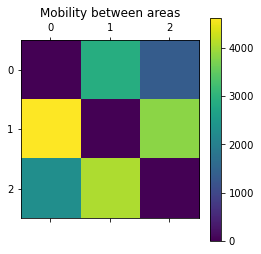

In [47]:
plt.matshow(Phi(0.34))
plt.title('Mobility between areas')
plt.colorbar()
plt.show()

In [34]:
cv19mobility.create_random_distances_matrix(3,seed=42)

array([[  0.        , 305.65545548, 414.44096493],
       [305.65545548,   0.        , 446.37949781],
       [414.44096493, 446.37949781,   0.        ]])

In [35]:
beta = np.array([0.2,0.15,0.11])
mu = np.array([1,0.8,1.2])


I = np.array([1000,0,1500])
I_d = np.array([100,0,150])
R = np.array([5000,10000,7500])
I_ac = np.array([4500,9000,6500])

rR_S = 0

#E = False
#E_d = False
popfraction = 1  # np.array([1,1,1])

In [36]:
cfg = '/home/samuel/covid19geomodeller/config_files/SEIRMETA.toml'

In [37]:
seir = SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,rR_S=rR_S,t_end=500)

In [38]:
seir.solve()

In [39]:
seir.global_results

,t,S,E,E_d,I,I_d,R,R_d
0,0,422200,2800,280,2500,250,22500,0
1,1,421842,2617,331,2776,431,22764,168
2,2,421451,2497,370,2997,480,23053,245
3,3,421034,2423,401,3179,486,23362,286
4,4,420593,2383,427,3334,482,23688,312
...,...,...,...,...,...,...,...,...
495,495,186831,0,0,2,0,263165,0
496,496,186831,0,0,2,0,263165,0
497,497,186831,0,0,2,0,263166,0
498,498,186831,0,0,1,0,263166,0


In [40]:
seir.results

,t,S,E,E_d,I,I_d,R,R_d,beta,tE_I,tI_R,rR_S,node
0,0,93000,1000,100,999,100,4999,0,0,5,10,0,0
1,1,92863,970,141,1064,140,5101,48,0,5,10,0,0
2,2,92718,955,162,1118,152,5207,68,0,5,10,0,0
3,3,92568,951,176,1165,155,5314,77,0,5,10,0,0
4,4,92412,954,186,1207,156,5424,81,0,5,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,495,62227,0,0,0,0,87649,126,0,5,10,0,2
1496,496,62227,0,0,0,0,87650,126,0,5,10,0,2
1497,497,62227,0,0,0,0,87650,126,0,5,10,0,2
1498,498,62227,0,0,0,0,87650,126,0,5,10,0,2


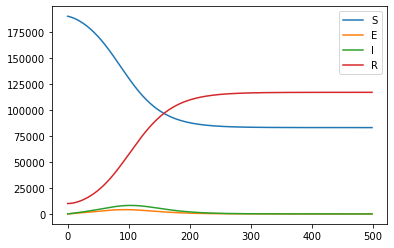

In [41]:
i = 1
plt.plot(seir.t,seir.S[i],label='S')
plt.plot(seir.t,seir.E[i],label='E')
plt.plot(seir.t,seir.I[i],label='I')
plt.plot(seir.t,seir.R[i],label='R')
plt.legend(loc=0)
plt.show()


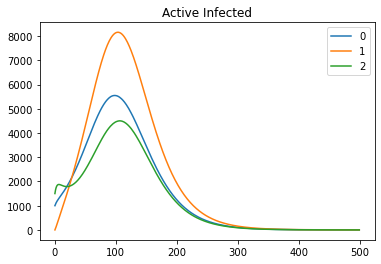

In [42]:
plt.plot(seir.t,seir.I[0],label='0')
plt.plot(seir.t,seir.I[1],label='1')
plt.plot(seir.t,seir.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

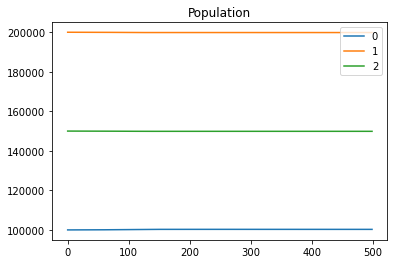

In [43]:
plt.plot(seir.t,seir.N[0],label='0')
plt.plot(seir.t,seir.N[1],label='1')
plt.plot(seir.t,seir.N[2],label='2')
plt.legend(loc=0)
plt.title('Population')
plt.show()

In [44]:
list(range(seir.nodes))

[0, 1, 2]

In [45]:

if seir.cfg['data']['state']:
    names = seir.cfg['data']['state']
elif seir.cfg['data']['county']:
    names = seir.cfg['data']['county']
else: 
    names = [str(i) for i in range(seir.nodes)]

In [46]:
names

['0', '1', '2']

## Output

In [20]:
seir.results

,t,S,E,E_d,I,I_d,R,R_d,beta,tE_I,tI_R,rR_S,node
0,0,93000,1000,100,1000,100,5000,0,0,5,10,0,0
1,1,52778,485,-190,554,-195,2888,-1320,0,5,10,0,0
2,2,15622,117,-265,140,-312,863,-1769,0,5,10,0,0
3,3,-21589,-175,-290,-230,-358,-1223,-1975,0,5,10,0,0
4,4,-58609,-495,-355,-674,-445,-3401,-2107,0,5,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,495,-884326347,-86906,-17461,6984,684,910047863,4775479,0,5,10,0,2
1496,496,-889072715,-87006,-17480,6968,682,914845835,4790506,0,5,10,0,2
1497,497,-893834145,-87105,-17500,6953,681,919658870,4805549,0,5,10,0,2
1498,498,-898610653,-87204,-17520,6937,679,924486982,4820609,0,5,10,0,2


In [21]:
seir.params

AttributeError: 'SEIRMETA' object has no attribute 'params'

In [ ]:
np.shape(seir.S.sum(axis=0))

In [ ]:
plt.plot(seir.t,seir.S.sum(axis=0),label='S')
plt.plot(seir.t,seir.E.sum(axis=0),label='E')
plt.plot(seir.t,seir.I.sum(axis=0),label='I')
plt.plot(seir.t,seir.R.sum(axis=0),label='R')
plt.legend(loc=0)
plt.show()

In [ ]:
aux = {}
for i in range(seir.nodes):
    aux[str(i)] = seir.results.loc[seir.results['node']==i].to_dict('list')

In [ ]:
json.dumps(aux)

# With configuration file

In [ ]:
cfg = 'cfg/SEIRMETA.toml'

In [ ]:
seir2 = SEIRMETA(config=cfg)

In [ ]:
seir2.solve()

In [ ]:
plt.plot(seir2.t,seir2.I[0],label='0')
plt.plot(seir2.t,seir2.I[1],label='1')
plt.plot(seir2.t,seir2.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

In [ ]:
seir2.results

In [ ]:
seir2.params

In [ ]:
seir2.nodes

In [ ]:
seir2.results

In [ ]:
aux = {}
for i in range(seir2.nodes):
    aux[str(i)] = seir2.results.loc[seir2.results['node']==i].to_dict()

In [ ]:
import json

In [ ]:
json.dumps(aux)

In [51]:
def radiation_model(populations, distances, fraction=0.2, **kwargs):
    """Calculate the radiation model mobility matrix.

    Args:
        populations (np.array): Array of populations for each region.
        distances (np.array): Matrix of distances between regions.
        fraction (float, optional): Fraction of the population that travels per day. Defaults to 0.5.

    Returns:
        np.array: Mobility matrix based on the radiation model.
    """
    num_regions = len(populations)
    mobility_matrix = np.zeros((num_regions, num_regions))

    for i in range(num_regions):
        for j in range(num_regions):
            if i != j:
                s_ij = populations[i] * populations[j]
                m_ij = (s_ij * distances[i, j]) / ((populations[i] + s_ij) * (populations[i] + populations[j] + distances[i, j] - s_ij))
                mobility_matrix[i, j] = m_ij

    # Normalize rows to prevent the total outgoing flux from exceeding the population
    row_sums = mobility_matrix.sum(axis=1, keepdims=True)
    mobility_matrix = mobility_matrix / row_sums * populations[:, np.newaxis] * fraction
    
    return mobility_matrix.astype(int)


In [52]:
radiation_model(populations=population, distances=cv19mobility.create_random_distances_matrix(3,seed=42), fraction=0.1)

array([[    0,  3561,  6438],
       [10133,     0,  9866],
       [ 9749,  5250,     0]])

In [54]:
population = np.array([100000, 200000, 150000])
seed = 42
distances = cv19mobility.create_random_distances_matrix(len(population), seed=seed)
mobility_matrix = radiation_model(population, distances)
print(mobility_matrix)


[[    0  7122 12877]
 [20267     0 19732]
 [19499 10500     0]]
